# Data PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing packagesimport pandas as pd
import pandas as pd
import csv
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/all_Mocapsamples_8people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

<bound method DataFrame.info of         Trial_number        x1        y1  ...        y2        z2  label
0                  1  2.567156 -1.651635  ... -8.051603  3.286658      0
1                  1  3.076574 -1.746254  ... -6.760365  2.431046      0
2                  1  3.463136 -1.829073  ... -5.450151  1.740691      0
3                  1  3.788543 -1.879726  ... -4.194374  1.144632      0
4                  1  4.081213 -1.854936  ... -3.002554  0.474182      0
...              ...       ...       ...  ...       ...       ...    ...
247799            16  0.389593 -0.836993  ... -0.026707  0.025357      2
247800            16  0.616373 -1.022211  ... -0.010827  0.031253      2
247801            16  0.706496 -1.130110  ...  0.006784  0.036765      2
247802            16  0.650840 -1.202800  ...  0.021199  0.042171      2
247803            16  0.595183 -1.275490  ...  0.035613  0.047576      2

[247804 rows x 8 columns]>
(247804, 8)
y = 
         label
0           0
1           0
2   

1    96040
2    89037
0    62727
Name: label, dtype: int64

## Create train and test subdatasets

In [ ]:
### Convert labels from [1,2,3] to [0,1,2]  Do it just in case the values starts in 1.
#y = y - 1
#print(y)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(198243, 6) (49561, 6)
(198243, 1) (49561, 1)


## Graphics

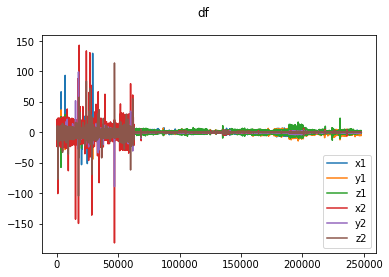

Loaded 247804 subjects


In [ ]:
name = 'df'
columns_names = ['x1','y1','z1','x2','y2','z2']
#plt.plot(df[name])
plt.plot(x)
plt.suptitle(name)
plt.legend(columns_names)
plt.show()

# plot the x, y, z acceleration and activities for multiple subjects
def plot_subject(subject):
	plt.figure()
	# create a plot for each column
	for col in range(subject.shape[0]):
		plt.subplot(subject.shape[0], 1, col+1)
		plt.plot(subject[:,col])
	plt.show()

# load
subjects = df
print('Loaded %d subjects' % len(subjects))


#Sliding Window Proccessing

In [ ]:
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
#df.loc[2:4]
#print(df.loc[2:4])

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

xx = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(xx[0:5]).loc
print("shape(xx) = ", xx.shape)

yy = np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print("shape(yy) = ", yy.shape)

#yy = np.array([ y.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
#print(yy[0:5])
#print("shape(yy) = ", yy.shape)
#yy[2].shape
#yy.reshape(-1,2)

   Trial_number        x1        y1  ...        y2        z2  label
0             1  2.567156 -1.651635  ... -8.051603  3.286658      0
1             1  3.076574 -1.746254  ... -6.760365  2.431046      0
2             1  3.463136 -1.829073  ... -5.450151  1.740691      0
3             1  3.788543 -1.879726  ... -4.194374  1.144632      0
4             1  4.081213 -1.854936  ... -3.002554  0.474182      0

[5 rows x 8 columns]
(247804, 8)
shape(xx) =  (247704, 100, 6)
shape(yy) =  (247704, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.2)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(198163, 100, 6) (49541, 100, 6)
(198163, 1) (49541, 1)


In [ ]:
print(X_train.shape[1])
print(X_train.shape[2])
print(y_train.shape[1])
print(np.unique(y_train).shape[0])
print(X_train.shape[0])


100
6
1
3
198163


# **CNN-LSTM Archicture**

#### Load Tensorflow libraries

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, TimeDistributed
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
print(tf.version.VERSION)
print(tf.keras.__version__)

2.4.1
2.4.0


198163
49541
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_5 (TimeDist (None, None, 23, 64)      1216      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 21, 64)      12352     
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 21, 64)      0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 10, 64)      0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 640)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               296400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100) 

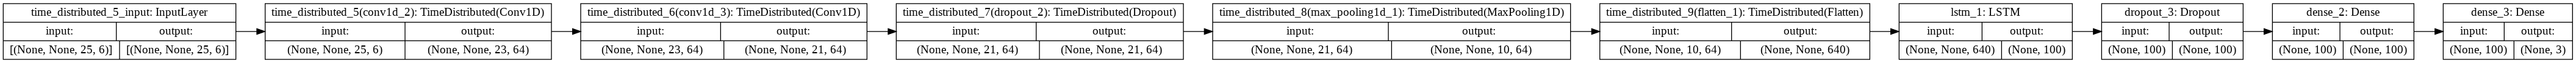

In [ ]:
# Define model
verbose, epochs, batch_size = 1, 25, 64

n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], np.unique(y_train).shape[0] 
#n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
#n_timesteps, n_features, n_outputs = 100, 6, 3

# reshape data into time steps of sub-sequences
n_steps, n_length = 4, 25 
X_train= X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
print(X_train.shape[0])
print(X_test.shape[0])

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# Plotting model
plot = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='LR')
print(model.summary())
plot

In [ ]:
epochs, batch_size = 25, 64
# fit network
start_time = time.perf_counter()

result = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False, validation_data=(X_test, y_test))

# evaluate model
end_time = time.perf_counter()
run_time = (end_time - start_time)
print( "time = " + str(int(run_time)) + " s = " + str(int(run_time//60)) + " mins" )

Epoch 1/25
3097/3097 [==============================] - 128s 41ms/step - loss: 0.1303 - sparse_categorical_accuracy: 0.9532 - val_loss: 0.0271 - val_sparse_categorical_accuracy: 0.9900
Epoch 2/25
3097/3097 [==============================] - 124s 40ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0135 - val_sparse_categorical_accuracy: 0.9952
Epoch 3/25
3097/3097 [==============================] - 125s 40ms/step - loss: 0.0145 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0046 - val_sparse_categorical_accuracy: 0.9986
Epoch 4/25
3097/3097 [==============================] - 125s 40ms/step - loss: 0.0087 - sparse_categorical_accuracy: 0.9971 - val_loss: 0.0047 - val_sparse_categorical_accuracy: 0.9983
Epoch 5/25
3097/3097 [==============================] - 125s 40ms/step - loss: 0.0082 - sparse_categorical_accuracy: 0.9973 - val_loss: 0.0015 - val_sparse_categorical_accuracy: 0.9997
Epoch 6/25
3097/3097 [==============================] - 124s 40ms/step - lo

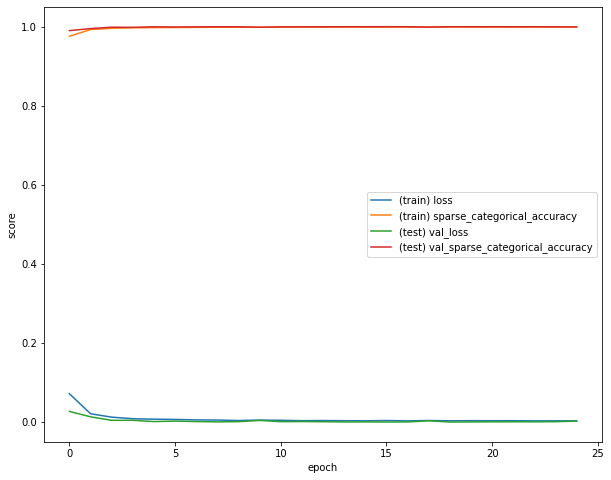

In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/'
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(111)
for key in result.history :
  #if key == "loss" or key == "val_loss": continue
  label = ("(test) " if key.startswith("val_") else "(train) ") + key
  plt.plot(result.history[key], label=label)
#ax.set(ylim=[-0.1, 1.1])no h
ax.set(xlabel="epoch", ylabel="score")
ax.legend()
plt.show()
fig.savefig(datafolder + "plot-train_test_loss_metrics_1_CNN_LSTM_8people.png")

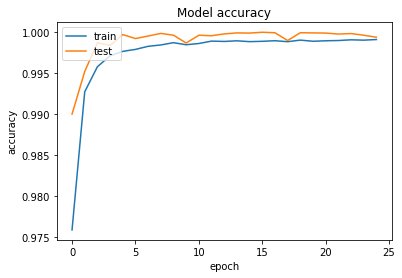

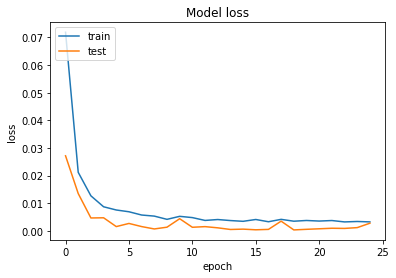

In [ ]:
# summarize history for accuracy
plt.plot(result.history['sparse_categorical_accuracy'])
plt.plot(result.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### Save
dnn_filename = datafolder + "trained_network_p1_CNN_LSTM_8people.h5"
model.save(dnn_filename)
print("Model saved to: " + dnn_filename)

### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_CNN_LSTM_8people.h5")
model.summary()

Model saved to: /content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/trained_network_p1_CNN_LSTM_8people.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_5 (TimeDist (None, None, 23, 64)      1216      
_________________________________________________________________
time_distributed_6 (TimeDist (None, None, 21, 64)      12352     
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 21, 64)      0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 10, 64)      0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 640)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               296400   

## Predict new data

**Data de las 2 últimas personas para hacer la predicción**

In [ ]:
##Loading csv files
path = r'/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/all_Mocapsamples_2people.csv'

df= pd.read_csv(path, skiprows=1, usecols=[0,1,2,3,4,5,6,7], names=['Trial_number','x1', 'y1', 'z1','x2', 'y2', 'z2','label'])
print (df.info)
print(df.shape)

#label outputs (y) Activities
y = pd.read_csv(path, usecols= [7])
print("y = \n",y)
print(y.shape)

#Standarizing
x = []
scaler = StandardScaler()
x = scaler.fit_transform(df)
x = pd.DataFrame(data = df, columns = ['x1','y1','z1','x2','y2','z2'])
print("x = \n",x)
print(x.shape)

#Verifying data shape
x.shape, y.shape   

#Counting number of samples per activity
y['label'].value_counts()

### Windowing
print(df.head())
print(df.shape)
#df.loc[3,"y2"]
df.loc[2:4]

dataset_size = df.shape[0] ### how many rows
window_size = 100 ### how many time steps we want to process simultaneously

X_test = np.array([ x.loc[i:(i+window_size-1)].values for i in range(dataset_size-window_size) ])
print(X_test[0:5])
print("shape(X_test) = ", X_test.shape)


y_test= np.array([ y.loc[i].values for i in range(dataset_size-window_size) ])
print(y_test[0:5])
print("shape(y_test) = ", y_test.shape)



<bound method DataFrame.info of        Trial_number        x1        y1  ...         y2         z2  label
0                17  2.409068 -2.002655  ... -32.745707  46.253188      0
1                17  1.954192 -1.748815  ... -26.659342  36.606456      0
2                17  1.446234 -1.475307  ... -20.098610  26.504507      0
3                17  0.904695 -1.181222  ... -13.895110  17.027530      0
4                17  0.366366 -0.873890  ...  -8.963661   8.938339      0
...             ...       ...       ...  ...        ...        ...    ...
67525            19  0.344518 -2.281883  ...  -0.236233  -0.226083      2
67526            19  0.568214 -2.170344  ...  -0.258082  -0.235790      2
67527            19  0.829192 -1.991115  ...  -0.260113  -0.217629      2
67528            19  1.206602 -1.667851  ...  -0.229846  -0.180814      2
67529            19  1.584013 -1.344587  ...  -0.199579  -0.144000      2

[67530 rows x 8 columns]>
(67530, 8)
y = 
        label
0          0
1         

In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K

print(tf.version.VERSION)
print(tf.keras.__version__)

2.7.0
2.7.0


In [ ]:
datafolder = '/content/drive/MyDrive/ColabNotebooks/Lisboa_Estancia/Mocap_Trials/'
### Load
model = tf.keras.models.load_model(datafolder + "trained_network_p1_CNN_LSTM_8people.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_5 (TimeDis  (None, None, 23, 64)     1216      
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 21, 64)     12352     
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 21, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, None, 10, 64)     0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, None, 640)       

In [ ]:
X_test = X_test.reshape((X_test.shape[0], 4, 25, 6))
start_time = time.perf_counter()
y_pred = model.predict(X_test)
end_time = time.perf_counter()

test_size = X_test.shape[0]
total_predict_time = (end_time - start_time) # in seconds
prediction_time_per_sample = round( ( (end_time - start_time)*1000)/test_size ,5) # in milliseconds
print(prediction_time_per_sample)

0.23308


In [ ]:
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features)) #tuve que hacerle reshape porque necesitaba ndim=4 y decía que era 3
y_pred = model.predict(X_test)  
#y_pred = model.predict_classes(X_test) 
print(y_pred.shape)
print(y_pred[0:20])

loss_function = 'sparse_categorical_crossentropy'
score_function = 'sparse_categorical_accuracy'

scores = model.evaluate(X_test, y_test)
print(loss_function," = ",scores[0])
print(score_function," = ",scores[1])

(67430, 3)
[[1.00000000e+00 3.96700088e-14 4.95074224e-14]
 [1.00000000e+00 5.00566148e-14 6.46407353e-13]
 [1.00000000e+00 3.31206349e-14 4.54975304e-13]
 [1.00000000e+00 2.76590782e-14 7.00786814e-14]
 [1.00000000e+00 6.99106944e-15 4.46289124e-14]
 [1.00000000e+00 1.40820623e-13 1.01188338e-13]
 [1.00000000e+00 1.95946124e-13 2.24999828e-13]
 [1.00000000e+00 1.80088285e-13 9.71896825e-13]
 [1.00000000e+00 8.02700869e-14 2.05037064e-13]
 [1.00000000e+00 1.11034066e-13 2.22609352e-13]
 [1.00000000e+00 1.84925859e-14 5.15208044e-15]
 [1.00000000e+00 8.93397498e-15 1.64144810e-15]
 [1.00000000e+00 2.92010096e-13 1.60739630e-14]
 [1.00000000e+00 1.25109978e-13 8.07338654e-16]
 [1.00000000e+00 1.68627373e-13 1.02525419e-15]
 [1.00000000e+00 1.43790741e-13 9.84695601e-16]
 [1.00000000e+00 6.66694754e-14 2.44988716e-15]
 [1.00000000e+00 9.48751948e-15 1.15894563e-15]
 [1.00000000e+00 8.77646751e-14 8.20578499e-15]
 [1.00000000e+00 1.54246343e-14 2.37947204e-15]]
2108/2108 [=================

Testing Accuracy: sparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_categorical_accuracysparse_cat

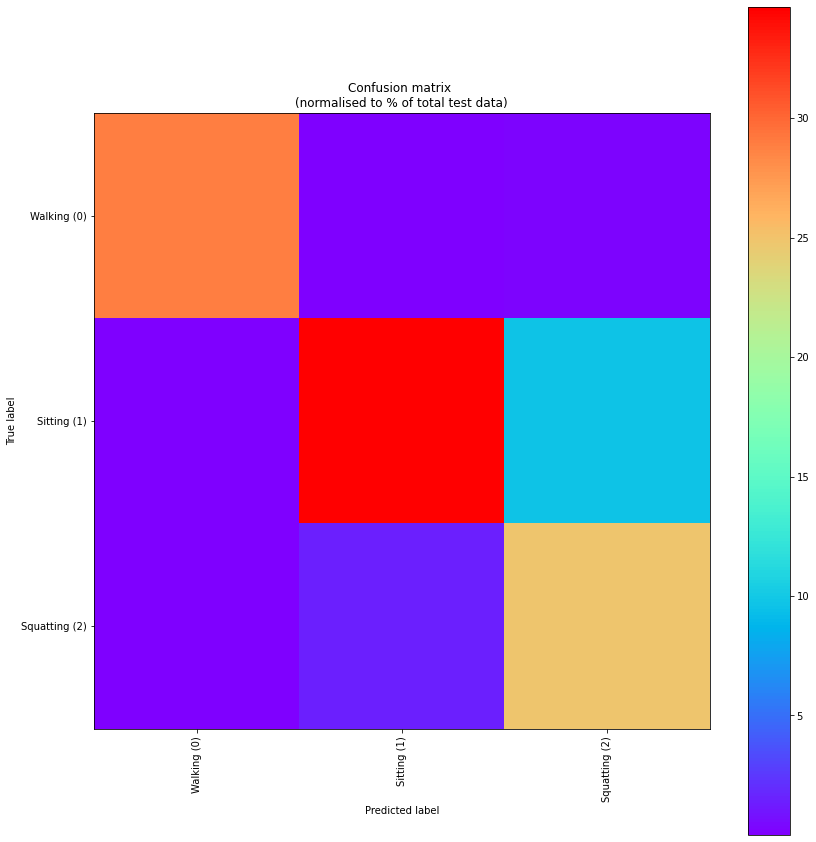

In [ ]:
# Results
import mlxtend

from sklearn import metrics 
predictions = y_pred.argmax(1)

print("Testing Accuracy: {}%".format(100*score_function))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.imshow(normalised_confusion_matrix,interpolation='nearest', cmap=plt.cm.rainbow)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
LABELS = ['Walking (0)', 'Sitting (1)', 'Squatting (2)']
tick_marks = np.arange(n_outputs)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [1]:
import numpy as np

confusion_matrix =np.asarray([[19474,    35,   156],
                              [    5, 23369,  6575],
                              [   84,   957, 16775]])
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP=FP.sum()
FN = FN.sum()
TP = TP.sum()
TN = TN.sum()
print(FP)
print(FN)
print(TP)
print(TN)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print(TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print(PPV)

7812
7812
59618
127048
0.8841465223194424
0.9420732611597212
0.8841465223194424


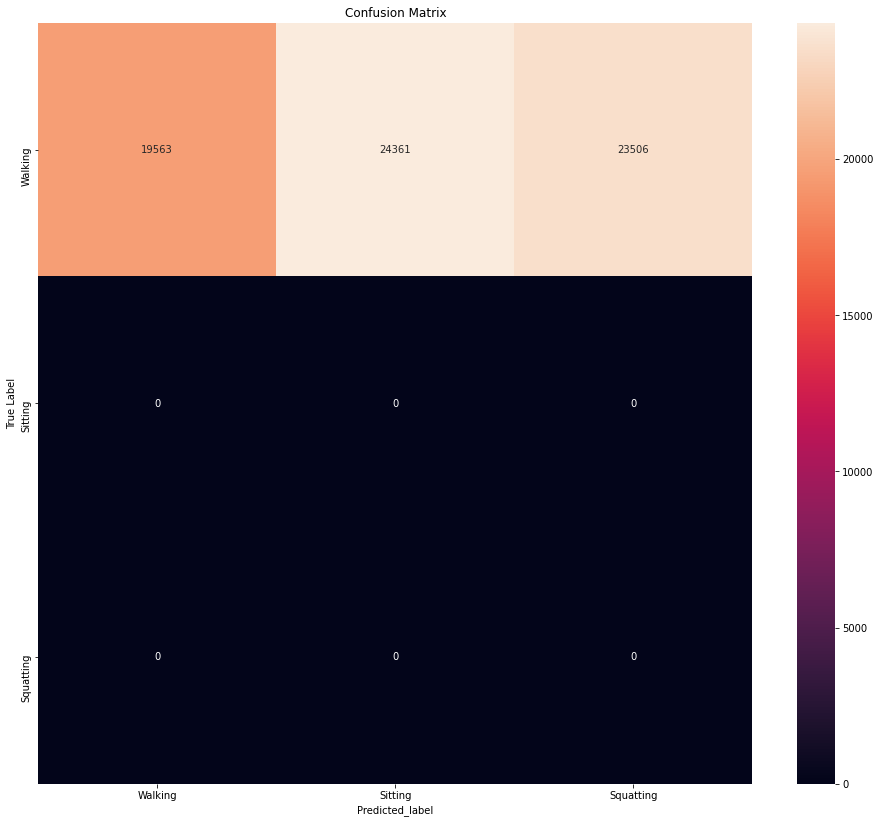

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

max_test = np.argmax(y_test, axis=1) 
max_predictions = np.argmax(y_pred, axis = 1) 
confusion_matrix = confusion_matrix(max_test, max_predictions)
LABELS = ['Walking', 'Sitting', 'Squatting']

plt.figure(figsize=(16,14)) 
sns.heatmap(confusion_matrix, xticklabels = LABELS, yticklabels = LABELS, annot =True, fmt = "d") 
plt.title("Confusion Matrix") 
plt.xlabel('Predicted_label') 
plt.ylabel('True Label') 
plt.show() 

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f03588572d0>)

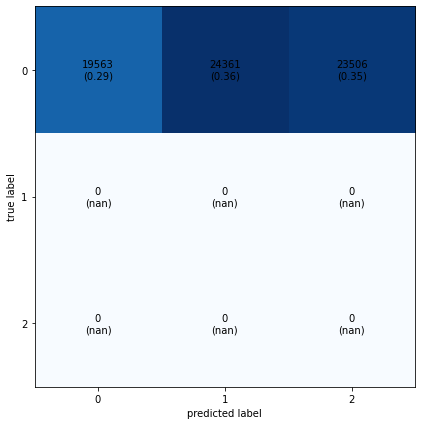

In [ ]:
# Confusion matrix
#!pip3 install mlxtend
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import numpy as np

max_test = np.argmax(y_test, axis= 1) 
max_predictions = np.argmax(y_pred, axis = 1) 
mat = confusion_matrix(max_test, max_predictions)

# plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))